# <font color='#2F4F4F'>1. Defining the Question</font>

## a) Specifying the Data Analysis Question

What is the question or problem you are trying to solve?

# Problem Statement
**Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination.
Build a model that predicts an accurate delivery time, from picking up a package arriving at the final
destination. An accurate arrival time prediction will help all business to improve their
logistics and communicate the accurate time their time to their customers. You will be
required to perform various feature engineering techniques while preparing your data for
further analysis.**


## b) Defining the Metric for Success

How will you know your project has succeeded?

**Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination.**

## c) Understanding the context 

What is the background information surrounding the research question?

# Background Information
**Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to
320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy
is a business-to-business platform established in 2014, to enable businesses of all types
and sizes to transport goods more efficiently across East Africa. The company is
headquartered in Kenya with a team of more than 100 staff, focused on building practical
solutions for Africa’s dynamic transportation needs, from developing apps and web
solutions to providing dedicated support for goods on the move.**

## d) Recording the Experimental Design

What steps will you take to answer the research question?

# Methodology

**I will be required to go through the following stages**
Defining the Research Question

*Defining the Research Question

● Data Importation

● Data Exploration

● Data Cleaning

● Data Analysis (Univariate and Bivariate)

● Data Preparation

● Data Modeling

● Model Evaluation

● Challenging your Solution

● Recommendations / Conclusion








## e) Data Relevance

Is the data provided relevant to the research question?

**Yes the Data provided is relevant**

## Dataset Information
The dataset provided by Sendy includes order details and rider metrics based on orders
made on the Sendy platform. The challenge is to predict the estimated time of arrival for
orders- from pick-up to drop-off. The dataset provided here is a subset of over 20,000
orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi.
All data in this subset have been fully anonymized while preserving the distribution.

Dataset URL = https://bit.ly/3deaKEM
Dataset Glossary = https://bit.ly/30O3xsr


## Hint
Create your base model (ensemble regressor), then later improve the accuracy of the
base model by performing the following feature engineering techniques:

● Feature improvement

 ○ Handle categorical features

 ○ Find and deal with missing values

 ○ Handle any outliers in your dataset





● Feature scaling (normalisation or standardisation etc.)

● Feature construction

○ Create new features i.e. speed = distance/time, manhattan distance from
pick up latitude and Longitude i.e. manhattan distance, haversine
distance, bearing, centre point etc.

● Feature Selection

○ Filter methods

○ Feature transformation (PCA, LDA, etc)

○ Wrapper methods


## Acknowledgements
Project Source: https://bit.ly/2Y6Hzz3

# <font color='#2F4F4F'>2. Data Cleaning & Preparation </font>

In [38]:
# load libraries 
import pandas as pd               # pandas for performing data manipulation
import numpy as np                # numpy for performing scientific computations
import matplotlib.pyplot as plt   # matplotlib for performing visualisation 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The following settings will improve the default style and font sizes for the charts in this notebook.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


# importing the required libraries 

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler

from math import radians, sin, cos, acos
import math
from math import radians, cos, sin, asin, sqrt
# Loading our dataset

ModuleNotFoundError: No module named 'plotly'

In [37]:
# load dataset
df = pd.read_csv('https://bit.ly/3deaKEM')
df.head(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [34]:
df.shape

(21201, 29)

In [27]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [27]:
# load glossary
glossary = pd.read_csv('/content/VariableDefinitions (2) (1).csv')
glossary

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [28]:
# check the data types of each of the columns 
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

The dataset has columns in both numerical and categorical data types.

In [16]:
#Separate categorical and numerical columns in the data frame
numerical_columns = df.columns[df.dtypes !='object']
categorical_columns = df.columns[df.dtypes =='object']

print(numerical_columns)
print(categorical_columns)

Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival'],
      dtype='object')
Index(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Arrival at Destination - Time', 'Rider Id'],
      dtype='object')


In [17]:
#getting the unique values in the categorical columns

df[categorical_columns].nunique().sort_values()

Vehicle Type                         1
Personal or Business                 2
Rider Id                           924
User Id                           3186
Placement - Time                 15686
Pickup - Time                    15690
Arrival at Destination - Time    15725
Confirmation - Time              15742
Arrival at Pickup - Time         15767
Order No                         21201
dtype: int64

*The 'Vehicle Type' has only of one unique value in the dataset. we may drop that column.

*'Personal or Business' has two unique values thus will be encoded before analysis

In [31]:
#checking the spread of the unique values of the column Personal or Business 

df['Personal or Business'].value_counts()

Business    17384
Personal     3817
Name: Personal or Business, dtype: int64

In [39]:
# Checking if there are duplicated Order No in the dataset using the Order No column
duplicate_order = df[df.duplicated('Order No')].sum()
duplicate_order

Order No                                     0.0
User Id                                      0.0
Vehicle Type                                 0.0
Platform Type                                0.0
Personal or Business                         0.0
Placement - Day of Month                     0.0
Placement - Weekday (Mo = 1)                 0.0
Placement - Time                             0.0
Confirmation - Day of Month                  0.0
Confirmation - Weekday (Mo = 1)              0.0
Confirmation - Time                          0.0
Arrival at Pickup - Day of Month             0.0
Arrival at Pickup - Weekday (Mo = 1)         0.0
Arrival at Pickup - Time                     0.0
Pickup - Day of Month                        0.0
Pickup - Weekday (Mo = 1)                    0.0
Pickup - Time                                0.0
Arrival at Destination - Day of Month        0.0
Arrival at Destination - Weekday (Mo = 1)    0.0
Arrival at Destination - Time                0.0
Distance (KM)       

## Observations 

1.   Each record of the dataset represents one order. there are no duplicated 
records using the order no, which is a unique value. Therefore the dataset contains 21201 delivery order records and 29 columns describing various order attributes.

2. The 'Order No' is unique for all columns thus may not be useful to the model.

In [33]:
#dropping 'Vehicle Type' and 'Order No' columns
df = df.drop(['Vehicle Type' ,'Order No'], axis=1 )
df

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,User_Id_633,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,User_Id_2285,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,User_Id_265,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,User_Id_1402,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,User_Id_1737,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,User_Id_2001,3,Personal,20,3,3:54:38 PM,20,3,3:55:09 PM,20,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,User_Id_1796,3,Business,13,6,10:13:34 AM,13,6,10:13:41 AM,13,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,User_Id_2956,3,Business,7,4,5:06:16 PM,7,4,5:07:09 PM,7,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,User_Id_2524,1,Personal,4,3,9:31:39 AM,4,3,9:31:53 AM,4,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279210,36.794872,Rider_Id_347,1380


# <font color='#2F4F4F'>3. Data Analysis </font>

# Univariate

In [ ]:
#We will use countplot to create the univariate count distribution plot of all categorical variables and numerical variables.
#Categorical variables
@ipywidgets.interact
def plot(col=df.select_dtypes(include = 'category').columns):          # categorical univariate plot
    sns.countplot(y=col, data=df);                                       #y indicates horizontal plot

interactive(children=(Dropdown(description='col', options=(), value=None), Output()), _dom_classes=('widget-in…

In [ ]:
#For numerical variables, we will use the distribution plot to check the distribution and boxplot to detect outliers.
#Numerical variables

#import warnings
#warnings.filterwarnings("ignore")
@ipywidgets.interact
def plot(col=df.select_dtypes(exclude = 'category').columns):          # numerical variable univariate plot
    f, ax = plt.subplots(figsize=(7, 3))
    ax = sns.distplot(df[col])                                         # visualize the distribution
    plt.show();
    ax = sns.boxplot(x=df[col])                                        # detect outliers
    plt.show();  

interactive(children=(Dropdown(description='col', options=('Platform Type', 'Personal or Business', 'Placement…

# Bivariate


In predictive classification models, the target variable is a categorical variable. We can just add the target variable as the hue layer to show the distribution by each target class. If the variable is predictive, we shall see significant distribution across classes of the target variable.

In [ ]:
#Categorical varaibles

@ipywidgets.interact
def plot(col=df.select_dtypes(include = 'categhue = 'Time from Pickup to Arrival'ory').columns):          # categorical univariate plot
    sns.countplot(y=col, , data=df);  

SyntaxError: ignored

In [ ]:
@ipywidgets.interact
def plot(col_x=df.select_dtypes(include = 'float').columns, col_y = 'Time from Pickup to Arrival'):          # numerical variable univariate plot
    targets = [df.loc[df[col_y] == val] for val in df[col_y].unique()]
    for target in targets:
        ax = sns.distplot(target[col_x])
    plt.show();  

interactive(children=(Dropdown(description='col_x', options=(), value=None), Text(value='Time from Pickup to A…

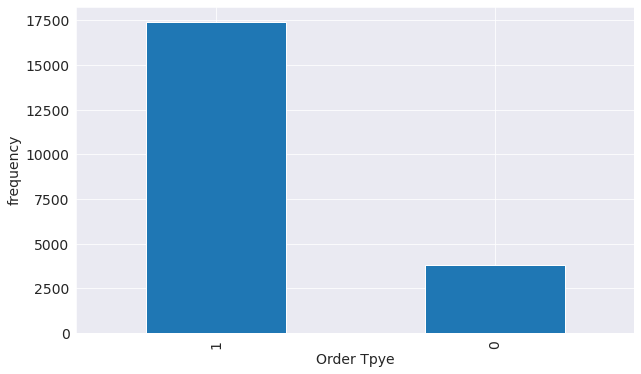

In [40]:
#encode the column 'Personal or Business' in order to plot the frequency of order type
df['Personal or Business'] = np.where(df['Personal or Business'].str.contains("Business", "Personal"), 1, 0)

#visualize the orders types: Personal or Business
fig, ax = plt.subplots()
df['Personal or Business'].value_counts().plot(ax=ax, kind='bar', xlabel='Order Tpye', ylabel='frequency')

plt.show()

Business orders made up the most of the orders

## Dealing with Null values
Null values adversely affect the performance and accuracy of machine learning algorithms. we shall impute the null values in the Temperature column in the dataset before applying any machine learning algorithm

In [41]:
# check how many null values exist in the data.
df.isnull().sum().sort_values(ascending = False)

Precipitation in millimeters                 20649
Temperature                                   4366
User Id                                          0
Pickup - Time                                    0
Rider Id                                         0
Destination Long                                 0
Destination Lat                                  0
Pickup Long                                      0
Pickup Lat                                       0
Distance (KM)                                    0
Arrival at Destination - Time                    0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Day of Month            0
Pickup - Weekday (Mo = 1)                        0
Platform Type                                    0
Pickup - Day of Month                            0
Arrival at Pickup - Time                         0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Day of Month                 0
Confirmation - Time            

Column temperature has 4366 missing values

In [42]:
# filling the missing values in the Temperature Column with the mean of that column
#Finding the mean of the Temperature column 
mean_value_temp=df['Temperature'].mean()
  
# Replace NaNs in column Temperature with the mean_value_temp

df['Temperature'].fillna(value=mean_value_temp, inplace=True)

In [43]:
# check if the column 'Temperature' was imputed with the mean
df.isnull().sum().sort_values(ascending = False)

Precipitation in millimeters                 20649
User Id                                          0
Pickup - Time                                    0
Rider Id                                         0
Destination Long                                 0
Destination Lat                                  0
Pickup Long                                      0
Pickup Lat                                       0
Temperature                                      0
Distance (KM)                                    0
Arrival at Destination - Time                    0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Day of Month            0
Pickup - Weekday (Mo = 1)                        0
Platform Type                                    0
Pickup - Day of Month                            0
Arrival at Pickup - Time                         0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Day of Month                 0
Confirmation - Time            

We shall drop "Precipitation in millimeters" later

# <font color='#2F4F4F'>4. Data Modeling</font>

First we check for modeling without Normalisation and Standardisation

In [44]:
# splitting the training and testing data
from sklearn.model_selection import train_test_split

#selecting the features to use
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Distance (KM)','Temperature']]
y = df['Time from Pickup to Arrival']

#splitting the subset dataframe  into 75-25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=27)

In [45]:
#view train/test datasets sizes
print('X.shape :', X.shape)
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)

X.shape : (21201, 14)
X_train.shape : (15900, 14)
X_test.shape : (5301, 14)


In [46]:
X_test

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature
4360,3,1,8,2,8,2,8,2,8,2,8,2,4,25.3
1518,3,0,27,3,27,3,27,3,27,3,27,3,2,29.1
20014,3,1,10,4,10,4,10,4,10,4,10,4,11,19.3
3243,3,1,25,2,25,2,25,2,25,2,25,2,4,23.8
5094,3,1,23,2,23,2,23,2,23,2,23,2,7,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13850,3,1,3,4,3,4,3,4,3,4,3,4,5,25.9
7668,3,1,21,3,21,3,21,3,21,3,21,3,2,23.4
9937,3,1,22,4,22,4,22,4,22,4,22,4,13,26.6
2062,3,1,13,4,13,4,13,4,13,4,13,4,8,18.4


In [47]:

#Importing the required libraries 
# from sklearn.svm import SVR 
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor  


#instantiating the models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# Fitting in our models  
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Evaluating the base model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 858.7028366910938
KNN RMSE: 909.4497001704725
Decision Tree RMSE: 1138.216804380862


The least RMSE score was obtained using SVM at 858.70 . we will be looking into reducing this RMSE values further

# Feature Improvement Techniques

## Dealing with Outliers

Checking for the outliers in the data as Outliers increase the variability in out data.Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations

In [48]:
# Getting a statistical summary of our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.222006,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.400000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


Some columns in the dataset eg Precipitation in millimeters have outliers

in this columns the mean>median therefore indicating that the tail is more on the right, ie the data has more variation on the right and can be termed as right-skewed.

In [49]:
#dropping the column 'Precipitation in millimeters' since it has too many null values 
df = df.drop(['Precipitation in millimeters'], axis=1 )
df.shape

(21201, 26)

In [50]:
# check if the column 'Precipitation in millimeters' has been dropped
df.isnull().sum().sort_values(ascending = False)

User Id                                      0
Platform Type                                0
Rider Id                                     0
Destination Long                             0
Destination Lat                              0
Pickup Long                                  0
Pickup Lat                                   0
Temperature                                  0
Distance (KM)                                0
Arrival at Destination - Time                0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Day of Month        0
Pickup - Time                                0
Pickup - Weekday (Mo = 1)                    0
Pickup - Day of Month                        0
Arrival at Pickup - Time                     0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Day of Month             0
Confirmation - Time                          0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Day of Month                  0
Placement - T

# Scaling Numeric Features

Scaling numeric features in the train and test datasets to ensure that no particular feature has a disproportionate impact on the model. The numeric columns in our dataset have varying ranges and will scaled to a small range of values between 

## a) Data Normalization
Normalization of the data using the MinMaxScaler from sklearn.preprocessing to scale the numerical values to the  range.

In [51]:
X_train.select_dtypes(include = np.number)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature
9296,3,1,28,4,28,4,28,4,28,4,28,4,16,30.000000
2709,3,1,4,4,4,4,4,4,4,4,4,4,6,25.700000
21027,3,1,6,3,6,3,6,3,6,3,6,3,14,23.258889
19690,3,1,16,2,16,2,16,2,16,2,16,2,10,23.258889
16216,1,0,20,1,20,1,20,1,20,1,20,1,9,20.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,3,1,28,4,28,4,28,4,28,4,28,4,11,19.500000
14879,3,1,6,3,6,3,6,3,6,3,6,3,19,22.300000
3912,3,1,29,1,29,1,29,1,29,1,29,1,6,23.258889
20152,3,1,14,4,14,4,14,4,14,4,14,4,6,25.000000


In [54]:
#instantiate scaler object
scaler = MinMaxScaler()

#'Fitting' the scaler to the data by computing the range of values for each numeric column in the X_train and X_test datasets
scaler.fit(X_train)

#MinMaxScaler()
# transform the training data
X_train_scaled = scaler.transform(X_train)
# transform the test data
X_test_scaled = scaler.transform(X_test)
#Checking that values in each column of the X_train and X_test lie in the range 

X_train_scaled.max()
# X_test.max()

1.0

## Modelling and evaluation using normalized training and test data

In [55]:
#Fitting in our models 

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  


#instantiating the models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# Fitting in our models  
svm_regressor.fit(X_train_scaled, y_train)
knn_regressor.fit(X_train_scaled, y_train)
dec_regressor.fit(X_train_scaled, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test_scaled)
knn_y_pred = knn_regressor.predict(X_test_scaled)
dec_y_pred = dec_regressor.predict(X_test_scaled)

# Evaluating the base model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))


SVM RMSE: 896.419010050985
KNN RMSE: 919.1635276531687
Decision Tree RMSE: 1134.8852474747728


After normalization the RMSE for the base model incresed for each algorithm except Decision Tree.

1) SVM RMSE: increased from 858.70 to 896.41

2) KNN RMSE: increased from 909.44 to 919.16

3) Decision Tree RMSE: reduced from 1138.21 to 1134.88

Conclusion; Normalization is not the best way to scale the numeric features of this dataset we can also explore Standarzisation

## b) Data Standardization
Standardisation of the data using the StandardScaler() from sklearn.preprocessing involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

In [56]:
X_train.select_dtypes(include = np.number)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature
9296,3,1,28,4,28,4,28,4,28,4,28,4,16,30.000000
2709,3,1,4,4,4,4,4,4,4,4,4,4,6,25.700000
21027,3,1,6,3,6,3,6,3,6,3,6,3,14,23.258889
19690,3,1,16,2,16,2,16,2,16,2,16,2,10,23.258889
16216,1,0,20,1,20,1,20,1,20,1,20,1,9,20.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,3,1,28,4,28,4,28,4,28,4,28,4,11,19.500000
14879,3,1,6,3,6,3,6,3,6,3,6,3,19,22.300000
3912,3,1,29,1,29,1,29,1,29,1,29,1,6,23.258889
20152,3,1,14,4,14,4,14,4,14,4,14,4,6,25.000000


In [59]:
# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler()

#'Fitting the scaler to the data by computing the range of values for each numeric column in the X_train and X_test datasets
Standard_scaler.fit(X_train)
StandardScaler()

#Scaling the dataset using the transform method of scaler.
# transform the training data
X_train_scalednew = Standard_scaler.transform(X_train)
# transform the test data
X_test_scalednew = Standard_scaler.transform(X_test)
X_train_scalednew.max()
# X_test.max()

6.9384509305403625

## Modelling and evaluation using scaled training and test data

In [60]:
# Fitting in our models 

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  


#instantiating the models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# Fitting in our models  
svm_regressor.fit(X_train_scalednew, y_train)
knn_regressor.fit(X_train_scalednew, y_train)
dec_regressor.fit(X_train_scalednew, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test_scalednew)
knn_y_pred = knn_regressor.predict(X_test_scalednew)
dec_y_pred = dec_regressor.predict(X_test_scalednew)

# Evaluating the base model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))


SVM RMSE: 869.3831877225746
KNN RMSE: 904.8321449369625
Decision Tree RMSE: 1136.2048041526978


SVM RMSE:  decreased  from 858.70 to 856.40

KNN RMSE: decreased  from 909.44 to 903.15

Decision Tree RMSE: decreased slightly from 1138.88 to 1138.16

Conclusion: Standarization is better for the dataset as the RMSE errors reducted in 2 models albeit by a small margin for Decision Tree

# Feature Construction

In [61]:
df.head(3)

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,...,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,User_Id_2285,3,0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,...,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,...,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


## speed (meters/sec)

Converting the distance in KMs to Meters, then inserting a 'Speed' column in the dataset which is a calculation of distance in meters/time in seconds

In [62]:
#using a function to compute speed and rename distance and time columns
def speed(df):
    df.rename(columns = {'Distance (KM)':'DistanceInKms'},inplace = True)
    df.rename(columns = {'Time from Pickup to Arrival':'Time'},inplace = True)
    df['Speed'] = (1000 *df.DistanceInKms) /(df.Time)
    return df

In [63]:
#call speed function to df
speed(df)
df.head(5)

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Arrival at Destination - Time,DistanceInKms,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time,Speed
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,...,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,5.369128
1,User_Id_2285,3,0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,...,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,8.028098
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,...,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,6.593407
3,User_Id_1402,3,1,15,5,9:25:34 AM,15,5,9:26:05 AM,15,...,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,6.711409
4,User_Id_1737,1,0,13,1,9:55:18 AM,13,1,9:56:18 AM,13,...,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,7.413509


In [64]:
df.shape

(21201, 27)

In [65]:
#joining new column Speed to X dataset
sub_df = df["Speed"]
merged_df = X.join(sub_df)
merged_df.head(3)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Speed
0,3,1,9,5,9,5,9,5,9,5,9,5,4,20.400000,5.369128
1,3,0,12,5,12,5,12,5,12,5,12,5,16,26.400000,8.028098
2,3,1,30,2,30,2,30,2,30,2,30,2,3,23.258889,6.593407


# Manhattan distance
Using the pick up latitude and Longitude to calculate the manhattan distance

Formual to calculate the Manhattan Distance is |x1 - x2| + |y1 - y2|. (that is, the difference between the latitudes and the longitudes). So, in our case, it would be:

In [66]:
# Distance, d = 3963.0 * arccos[(sin(lat1) * sin(lat2)) + cos(lat1) * cos(lat2) * cos(long2 – long1)]
# print("Input coordinates of two points:")
# slat = radians(float(input("Starting latitude: ")))
# slon = radians(float(input("Ending longitude: ")))
# elat = radians(float(input("Starting latitude: ")))
# elon = radians(float(input("Ending longitude: ")))

# dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
# print("The distance is %.2fkm." % dist)


# Input coordinates of two points:                                                                              
# Starting latitude: 23.5                                                                                       
# Ending longitude: 67.5                                                                                        
# Starting latitude: 25.5                                                                                       
# Ending longitude: 69.5

#Latitudes range from -90 to 90, and longitudes range from -180 to 80
df['Pickup Lat'].max()

-1.1471704

In [67]:
df['Pickup Lat'].min()

-1.4383017

In [68]:
#using a function to compute manhattan distance fr each record and rename latitude and longitude columns
def distance(df):
     df.rename(columns = {'Pickup Lat':'Starting_latitude'},inplace = True)
     df.rename(columns = {'Pickup Long':'Starting_longitude'},inplace = True)
     df.rename(columns = {'Destination Lat':'Ending_latitude'},inplace = True)
     df.rename(columns = {'Destination Long':'Ending_longitude'},inplace = True)
     df['slat'] = (df.Starting_latitude/57.29577951) #covert latitude value to radians
     df['slon'] = (df.Starting_longitude/57.29577951)
     df['elat'] = (df.Ending_latitude/57.29577951)
     df['elon'] = (df.Ending_longitude/57.29577951)
     df[["slat", "slon","elat", "elon"]] = df[["slat", "slon","elat", "elon"]].apply(pd.to_numeric)
    #  df['Manhattan_dist'] = (6371.01 * acos(sin(df.slat) * sin(df.elat) + cos(df.slat) * cos(df.elat)*cos(df.slon - df.elon))).astype(float)


In [69]:
distance(df)
df.dtypes

User Id                                       object
Platform Type                                  int64
Personal or Business                           int64
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                 object
DistanceInKms                                 

In [70]:
#  df['Manhattan_dist'] = (6371.01 * acos(sin(df.slat) * sin(df.elat) + cos(df.slat) * cos(df.elat)*cos(df.slon - df.elon))).astype(float)
df.head(3)

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Starting_longitude,Ending_latitude,Ending_longitude,Rider Id,Time,Speed,slat,slon,elat,elon
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,...,36.830370,-1.300406,36.829741,Rider_Id_432,745,5.369128,-0.022999,0.642811,-0.022696,0.642800
1,User_Id_2285,3,0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,...,36.899315,-1.295004,36.814358,Rider_Id_856,1993,8.028098,-0.023587,0.644015,-0.022602,0.642532
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,...,36.843419,-1.300921,36.828195,Rider_Id_155,455,6.593407,-0.022834,0.643039,-0.022705,0.642773


In [71]:
df.slat.max()

-0.02002190056249747

Let's view the results of the new columns created.

In [72]:
df[['slat', 'slon', 'elat', 'elon']].sample(20)

,slat,slon,elat,elon
17717,-0.022981,0.642807,-0.022801,0.641443
20563,-0.022019,0.642157,-0.023065,0.642920
6371,-0.022625,0.641737,-0.022465,0.643850
8903,-0.022501,0.642721,-0.022583,0.641578
16529,-0.022912,0.643497,-0.021855,0.641473
18407,-0.021916,0.642522,-0.022202,0.642200
12637,-0.021907,0.641971,-0.022380,0.642619
21169,-0.021462,0.643046,-0.021993,0.642436
13199,-0.021907,0.641971,-0.023029,0.643492
12041,-0.024229,0.641757,-0.024678,0.640640


# Feature Selection Techniques

## Filter Method:Pearson's Correlation Coefficient
Using the pearson's correlation coefficient to resolve the most important features in a dataset and drop features that are not highly correlated to our response variable.

In [73]:
df.head(3)

,User Id,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,...,Starting_longitude,Ending_latitude,Ending_longitude,Rider Id,Time,Speed,slat,slon,elat,elon
0,User_Id_633,3,1,9,5,9:35:46 AM,9,5,9:40:10 AM,9,...,36.830370,-1.300406,36.829741,Rider_Id_432,745,5.369128,-0.022999,0.642811,-0.022696,0.642800
1,User_Id_2285,3,0,12,5,11:16:16 AM,12,5,11:23:21 AM,12,...,36.899315,-1.295004,36.814358,Rider_Id_856,1993,8.028098,-0.023587,0.644015,-0.022602,0.642532
2,User_Id_265,3,1,30,2,12:39:25 PM,30,2,12:42:44 PM,30,...,36.843419,-1.300921,36.828195,Rider_Id_155,455,6.593407,-0.022834,0.643039,-0.022705,0.642773


In [74]:
from sklearn.model_selection import train_test_split

# We select our features

X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
X.head(3)

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)


# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 850.4777457599937
KNN RMSE: 862.0363601524862
Decision Tree RMSE: 83.62216001093891


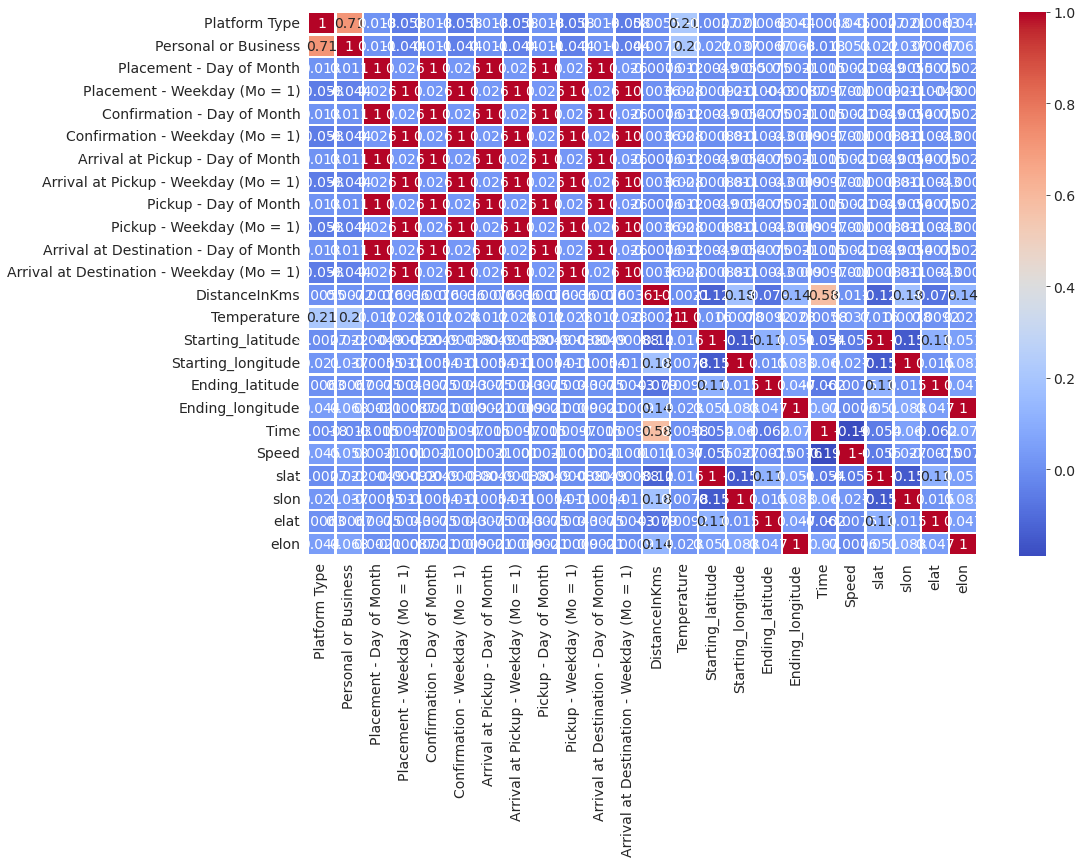

In [75]:
# Then appply filter methods by plotting a correlation matrix

df_corr = df.corr()
plt.figure(figsize=(15,10))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=1.5, cmap='coolwarm');

# Feature importance
The Decison Tree Regressor provides a feature importance score for each column in the input

In [76]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': dec_regressor.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(15)

,feature,importance
12,DistanceInKms,0.501337
14,Speed,0.496984
13,Temperature,0.000320
10,Arrival at Destination - Day of Month,0.000304
16,slon,0.000231
6,Arrival at Pickup - Day of Month,0.000227
17,elat,0.000222
18,elon,0.000089
15,slat,0.000077
9,Pickup - Weekday (Mo = 1),0.000048


We will drop the below columns as they have the weakest correlation to Time which is our target variable.

feature: importance

1) Platform Type: 0.000003

2) Personal or Business: 0.000003

3) Pickup - Weekday (Mo = 1): 0.000012

4) Arrival at Pickup - Day of Month: 0.000013

5) Arrival at Destination - Day of Month: 0.000014

In [77]:
new_df = df.drop(columns =['Platform Type','Personal or Business','Pickup - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Destination - Day of Month' ] )
new_df.columns

Index(['User Id', 'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Confirmation - Time',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Time',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'DistanceInKms', 'Temperature',
       'Starting_latitude', 'Starting_longitude', 'Ending_latitude',
       'Ending_longitude', 'Rider Id', 'Time', 'Speed', 'slat', 'slon', 'elat',
       'elon'],
      dtype='object')

## Implementation and Evaluation

In [78]:
# Then perform our modeling, comparing the resulting accuracy to the previous base solution.
# ---
# We select our features
X = new_df[['DistanceInKms','Speed','Temperature', 'Placement - Day of Month','Pickup - Day of Month', 'elat','slon','Confirmation - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','elon','slat','Placement - Weekday (Mo = 1)','Arrival at Destination - Weekday (Mo = 1)','Confirmation - Weekday (Mo = 1)']]
y = new_df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 836.1102014674055
KNN RMSE: 837.9494207323654
Decision Tree RMSE: 97.67069756436813


## Observation
After applying the filter feature selection and using the important features only, the RMSE for each of the models has decreased comapred to the base model

SVM RMSE: decreased from 850.47 to 836.11

KNN RMSE: decreased from 862.03 to 837.94

Decision Tree RMSE: increased from 83.62 to 97.67

# Wrapper Method: Step Forward Feature Selection

In [79]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),...,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,...,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,...,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,...,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,...,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,...,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,...,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


In [80]:
# Count the NaN under an entire DataFrame:
df.isnull().sum().sum()

0

## Implementation and Evaluation

In [81]:
# We'll need import and install the following packages: six, sys, mlrose and joblib
# to use `SequentialFeatureSelector` for feature selection from mlxtend.

# importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [83]:
# Creating a base model by performing standardization.
# we shall use this base model to comapre to the solution after perfoming feature selection - Wrapper Method: Step Forward 

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Selecting the ML algorithm to use   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We pass the dec_regressor the estimator to the SequentialFeatureSelector function. 
# The k_features specifies the number of features to select. 
# We can set any number of features here. The forward parameter, if set to True, 
# performs step forward feature selection. The verbose parameter is used for logging 
# the progress of the feature selector, the scoring parameter defines the performance 
# evaluation criteria and finally, cv refers to cross-validation folds.
# ---
# Hint: Hover cursor on SequentialFeatureSelector to get a list of more parameter values.
# ---
#
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=4,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)

# Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.8s finished

[2022-05-09 12:51:13] Features: 1/4 -- score: 0.34358359489505375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.9s finished

[2022-05-09 12:51:14] Features: 2/4 -- score: 0.9964584602792753[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.4s finished

[2022-05-09 12:51:17] Features: 3/4 -- score: 0.9965035065261879[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [84]:
# Getting the selected features?# The columns at these indexes are those which were selected

feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[0, 7, 12, 14]


In [86]:
#getting the selected columns names using their indexes above
X.columns[[0, 7, 12, 14]]

Index(['Platform Type', 'Arrival at Pickup - Weekday (Mo = 1)',
       'DistanceInKms', 'Speed'],
      dtype='object')

In [87]:
# We can now use those features to build our model

# Without step forward feature selection (sffs)
dec_regressor = DecisionTreeRegressor(random_state=27)
dec_regressor.fit(X_train, y_train)

# With step forward feature selection
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree RMSE Without sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Decision Tree RMSE Without sffs: 97.84823533247602
Decision Tree RMSE with sffs: 79.22908901297635


## Observation
After applying the Wrapper-Step Forward feature selection, the RMSE for the base model we used has decreased from 97.84 to 79.22

the chosen features are:

[0] - 'Platform Type',

[7] - 'Arrival at Pickup - Weekday (Mo = 1)',

[12] - 'DistanceInKms',

[14] - 'Speed'

# Wrapper Method: Step Backward Feature Selection

In [88]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),...,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,...,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,...,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,...,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,...,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,...,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,...,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


## Implementation and Evaluation

In [89]:
# Creating a base model by performing standardization.
# we shall use this base model to compare to the solution after perfoming feature selection - Wrapper Method: Step Backward 
# ---

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Selecting the ML algorithm to use   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We pass the dec_regressor the estimator to the SequentialFeatureSelector function. 
# The k_features specifies the number of features to select. 
# We can set any number of features here. The forward parameter, if set to False, 
# performs step backward feature selection. The verbose parameter is used for logging 
# the progress of the feature selector, the scoring parameter defines the performance 
# evaluation criteria and finally, cv refers to cross-validation folds.
# ---
# Hint: Hover cursor on SequentialFeatureSelector to get a list of more parameter values.
# ---
#
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=4,
           forward=False,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step backward feature selection
feature_selector = feature_selector.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   10.8s finished

[2022-05-09 13:31:49] Features: 18/4 -- score: 0.9934949847134877[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    9.4s finished

[2022-05-09 13:31:58] Features: 17/4 -- score: 0.9943235573391767[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    8.1s finished

[2022-05-09 13:32:06] Features: 16/4 -- score: 0.9947559635502204[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [90]:
#Getting the selected features, The columns at these indexes are those which were selected

feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[0, 4, 12, 14]


In [91]:
#getting the selected columns names using their indexes above
X.columns[[0, 4, 12, 14]]

Index(['Platform Type', 'Confirmation - Day of Month', 'DistanceInKms',
       'Speed'],
      dtype='object')

In [92]:
# We can now use those features to build a full model

# Without step backward feature selection (sbfs)
dec_regressor = DecisionTreeRegressor(random_state=27)
dec_regressor.fit(X_train, y_train)

# With step backward feature selection
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies  
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree RMSE Without sbfs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sbfs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

Decision Tree RMSE Without sbfs: 97.84823533247602
Decision Tree RMSE with sbfs: 71.94717183665522


## Observation
After applying the Wrapper-Step backward feature selection, the RMSE for the base model we used has decreased from 97.84 to 71.94

the chosen features are:

1)'Platform Type',

2)'Confirmation - Day of Month',

3)'DistanceInKms',

4)'Speed'

#Wrapper Method: Recursive Feature Elimination

In [93]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),...,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,...,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,...,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,...,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,...,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,...,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,...,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


## Implementation and Evaluation

In [94]:
# Creating a model by performing standardization, and then perfoming feature selection - Wrapper Method: Recursive Feature Selection
# ---

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)
 
# Performing standardisation
from sklearn.preprocessing import StandardScaler

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Fitting in our models   

svm_regressor = SVR(kernel="linear")   
dec_regressor = DecisionTreeRegressor(random_state=27)

# We want to select the best 2 features for our model. 
# NB: n_features_to_select will include the response variable
# ---
#  
from sklearn.feature_selection import RFE
svm_regressor = RFE(svm_regressor, n_features_to_select = 3, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 3, step=1)

svm_regressor.fit(X_train, y_train) 
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test) 
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))) 
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
 
# Displaying our best features
print('SVM Selected features: %s' % list(X.columns[svm_regressor.support_]))
print('Decision Tree Selected features: %s' % list(X.columns[dec_regressor.support_]))

SVM RMSE: 809.7795057105936
Decision Tree RMSE: 83.97268628626657
SVM Selected features: ['DistanceInKms', 'Speed', 'slon']
Decision Tree Selected features: ['DistanceInKms', 'Speed', 'elon']


## Observations
The RFE was used to select the features (columns) in the training dataset that are most relevant in predicting the target variable Time.

1) using the algorithm SVM, the selected features are :'DistanceInKms', 'Speed', 'slon'

2) using the algorithm Decision Tree, the Selected features are:'DistanceInKms', 'Speed', 'elon'

 3) The RFE with a decision tree model achieves a much smaller RMSE value of 83.97268

# Feature Transformation: Principal Component Analysis

In [95]:
# Describing our dataset
df.describe()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),...,Starting_latitude,Starting_longitude,Ending_latitude,Ending_longitude,Time,Speed,slat,slon,elat,elon
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,0.819961,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,...,-1.281470,36.811264,-1.282581,36.811220,1556.920947,69.251494,-0.022366,0.642478,-0.022385,0.642477
std,0.625178,0.384229,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,...,0.030507,0.037473,0.034824,0.044721,987.270788,529.249252,0.000532,0.000654,0.000608,0.000781
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.438302,36.653621,-1.430298,36.606594,1.000000,0.255624,-0.025103,0.639726,-0.024963,0.638906
25%,3.000000,1.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,...,-1.300921,36.784605,-1.301201,36.785661,882.000000,4.573171,-0.022705,0.642012,-0.022710,0.642031
50%,3.000000,1.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,...,-1.279395,36.807040,-1.284382,36.808002,1369.000000,6.406834,-0.022330,0.642404,-0.022417,0.642421
75%,3.000000,1.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,...,-1.257147,36.829741,-1.261177,36.829477,2040.000000,8.413462,-0.021941,0.642800,-0.022012,0.642796
max,4.000000,1.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,...,-1.147170,36.991046,-1.030225,37.016779,7883.000000,17000.000000,-0.020022,0.645616,-0.017981,0.646065


## Implementation and Evaluation

In [96]:
# Creating the base models and check for the accuracy, later compare it with the PCA implementation.

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 838.322608647437
KNN RMSE: 844.6372049539696
Decision Tree RMSE: 97.84823533247602


In [97]:
# Applying PCA to our base model above

# Selecting the features 
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','DistanceInKms','Temperature','Speed', 'slat','slon','elat','elon']]
y = df['Time']

# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

#instantiate scaler object
Standard_scaler = StandardScaler() 

#fit the scaler
Standard_scaler.fit(X_train)

# transform the training&test data ie Scaling the dataset using the transform method of scaler.
X_train = Standard_scaler.transform(X_train)
X_test = Standard_scaler.transform(X_test)

# Applying PCA
# ---
# NB: PCA relies the feature set and not the label data.
# ---
# 
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 838.322608647437
KNN RMSE: 844.6372049539696
Decision Tree RMSE: 1095.841599284123


## Observation
The RMSE for the decison model has greatly increased to 1095.84 as compared to the base model which was 97.67

# <font color='#2F4F4F'>5. Summary of Findings</font>

What can you conclude?

* Generally RMSE scrores improved after performing feature engineering


* Feature engineering aspects of cleaning data, feature scaling and transformation, removing of null values etc improves the performance of a machine learning model









# <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide?

**We will do cross validation and K-Folds cross validation in an attempt to improve our models**

# <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?


#### b) Did we have the right data?

Yes we did have the right data

#### c) What can be done to improve the solution?

We will try cross validation and K-Folds cross validation in an attempt to improve our models.


### 7.1 Improving the Solution

We will try cross validation and K-Folds cross validation in an attempt to improve our models.

Perform more feature engineering

Hyperparameter tuning

Get more data to train

#### 7.1.1 Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score as cvs

log_scores = cvs(log, X, y, cv = 3)
print("Logistic Regression CV scores:", log_scores)

tree_scores = cvs(tree, X, y, cv = 3)
print("Decision Tree CV scores:", tree_scores)

svm_scores = cvs(svm, X, y, cv = 3)
print("Support Vector Machine CV scores:", svm_scores)

nb_scores = cvs(nb, X, y, cv = 3)
print("Naive Bayes CV scores:", nb_scores)

knn_scores = cvs(knn, X, y, cv = 3)
print("K-Neighbors CV scores:", knn_scores)

bag_scores = cvs(bag, X, y, cv = 3)
print("Bagging CV scores:", bag_scores)

rf_scores = cvs(rf, X, y, cv = 3)
print("Random Forest CV scores:", rf_scores)

ada_scores = cvs(ada, X, y, cv = 3)
print("Ada Boosting CV scores:", ada_scores)

grad_scores = cvs(grad, X, y, cv = 3)
print("Gradient Boosting CV scores:", grad_scores)

xgb_scores = cvs(xgb, X, y, cv = 3)
print("XG Boosting CV scores:", xgb_scores)

#### 7.1.2 K-Folds Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# applying KFold with 3 splits onto our features
kf3 = KFold(n_splits = 3, shuffle = True)
kf3.split(X)

print("We are using " + str(kf3.get_n_splits(X)) + " folds.\n")

model_count = 1 # to keep track of the model we are working with

# creating training and test sets using these folds
for train_index, test_index in kf3.split(X):
    print("Training fold", model_count)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    log.fit(X_train, y_train)
    log_pred = log.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("Linear Regression Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
    print("Accuracy:", accuracy_score(y_test, log_pred))
    print()
    
    tree.fit(X_train, y_train)
    tree_pred = tree.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, tree_pred))
    print("Accuracy:", accuracy_score(y_test, tree_pred))
    print()
    
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("Support Vector Machine Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
    print("Accuracy:", accuracy_score(y_test, svm_pred))
    print()
    
    nb.fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
    print("Accuracy:", accuracy_score(y_test, nb_pred))
    print()
    
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("K-Neighbors Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
    print("Accuracy:", accuracy_score(y_test, knn_pred))
    print()
    
    bag.fit(X_train, y_train)
    bag_pred = bag.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("Bagging Confusion Matrix:\n", confusion_matrix(y_test, bag_pred))
    print("Accuracy:", accuracy_score(y_test, bag_pred))
    print()
    
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
    print("Accuracy:", accuracy_score(y_test, rf_pred))
    print()
    
    ada.fit(X_train, y_train)
    ada_pred = ada.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("Ada Boosting Confusion Matrix:\n", confusion_matrix(y_test, ada_pred))
    print("Accuracy:", accuracy_score(y_test, ada_pred))
    print()
    
    grad.fit(X_train, y_train)
    grad_pred = grad.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, grad_pred))
    print("Accuracy:", accuracy_score(y_test, grad_pred))
    print()
    
    xgb.fit(X_train, y_train)
    xgb_pred = xgb.predict(X_test)
    print("Assessing accuracy of model", model_count)
    print("XG Boosting Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
    print("Accuracy:", accuracy_score(y_test, xgb_pred))
    print()
    
    model_count += 1

We are using 3 folds.

Training fold 1
Assessing accuracy of model 1
Linear Regression Confusion Matrix:
 [[480   4]
 [  8 206]]
Accuracy: 0.9828080229226361

Assessing accuracy of model 1
Decision Tree Confusion Matrix:
 [[480   4]
 [  4 210]]
Accuracy: 0.9885386819484241

Assessing accuracy of model 1
Support Vector Machine Confusion Matrix:
 [[484   0]
 [ 87 127]]
Accuracy: 0.8753581661891118

Assessing accuracy of model 1
Naive Bayes Confusion Matrix:
 [[481   3]
 [  2 212]]
Accuracy: 0.9928366762177651

Assessing accuracy of model 1
K-Neighbors Confusion Matrix:
 [[481   3]
 [ 10 204]]
Accuracy: 0.9813753581661891

Assessing accuracy of model 1
Bagging Confusion Matrix:
 [[480   4]
 [  2 212]]
Accuracy: 0.9914040114613181

Assessing accuracy of model 1
Random Forest Confusion Matrix:
 [[480   4]
 [  2 212]]
Accuracy: 0.9914040114613181

Assessing accuracy of model 1
Ada Boosting Confusion Matrix:
 [[480   4]
 [  4 210]]
Accuracy: 0.9885386819484241

Assessing accuracy of model 1
G